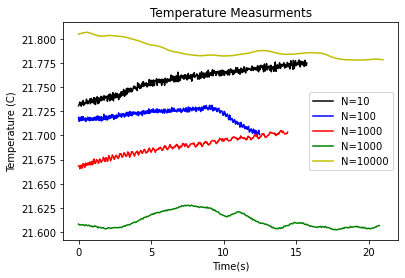

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

xdat1, ydat1 = np.genfromtxt('10.lvm', delimiter="\t", unpack=True, skip_header=0)
xdat2, ydat2= np.genfromtxt('100.lvm', delimiter="\t", unpack=True, skip_header=0)
xdat3, ydat3 = np.genfromtxt('1000.lvm', delimiter="\t", unpack=True, skip_header=0)
xdat4, ydat4 = np.genfromtxt('10000.lvm', delimiter="\t", unpack=True, skip_header=0)
xdat5, ydat5 = np.genfromtxt('100000.lvm', delimiter="\t", unpack=True, skip_header=0)
 
plt.plot(xdat1, ydat1,"k-", label = "N=10")
plt.plot(xdat2, ydat2,"b-", label = "N=100")
plt.plot(xdat3, ydat3,"r-", label = "N=1000")
plt.plot(xdat4, ydat4,"g-", label = "N=1000")
plt.plot(xdat5, ydat5,"y-", label = "N=10000")
plt.legend()
plt.xlabel("Time(s)")
plt.ylabel("Temperature (C)")
plt.title("Temperature Measurments")
plt.show()
#plt.ylim(21.029, 21.035)
#plt.xlim(1.5, 1.9)
#plt.grid()










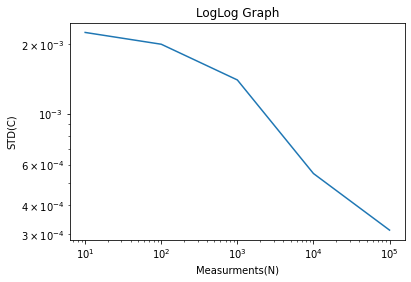

In [3]:
x = np.array([10, 100, 1000, 10000, 100000])
y = np.array([0.00225, 0.002, 0.0014, 0.00055, 0.0003125])
plt.xlabel("Measurments(N)")
plt.ylabel("STD(C)")
plt.title("LogLog Graph")
plt.loglog(x, y)



(0.0, 3.0)

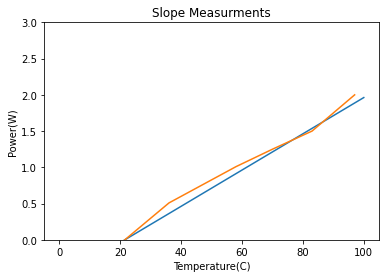

In [163]:
# In[67]:



def t_model(T, t, P):
    return (T-t)/P
t_init = 21.5
P_init = 40


#temp_set = np.array([21.5, 37.5, 56.1, 63.1, 77.7, 90.4])
temp_set = np.array([21.5,36,58, 70, 83, 90, 97])
p = np.array([0,0.509, 1.009, 1.25, 1.5, 1.75,2])
plt.plot(x_dat, t_model(x_dat, t_init, P_init))
plt.plot(temp_set, p)
plt.xlabel("Temperature(C)")
plt.ylabel("Power(W)")
plt.title("Slope Measurments")
plt.ylim(0, 3)

#slope = np.polyfit(,Y,1)[0]

68109944734733.05
28.175905406482098


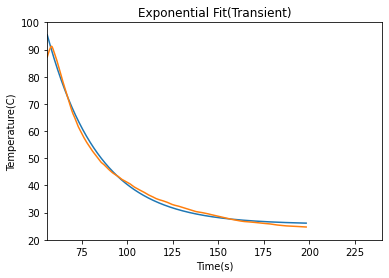

In [175]:
from scipy.optimize import curve_fit
xdat, ydat = np.genfromtxt('T.lvm', delimiter="\t", unpack=True, skip_header=0)
error = 0.000875

def e(t, tau, a, c):
    return (np.exp(-(t-a)/tau)+c)
tau_init = 30
a_init = 35
c_init = 20
x = np.linspace(21, 235, 3330)
pOpt, pCov = curve_fit(e, xdat[857:], ydat[857:], [tau_init, a_init, c_init], sigma = np.ones(len(xdat[857:])) * error, absolute_sigma = True,maxfev=50000)
tau_opt = pOpt[0]
a_opt = pOpt[1]
c_opt = pOpt[2]


plt.plot(xdat,e(xdat, tau_opt, a_opt, c_opt))
plt.plot(xdat, ydat)
plt.ylabel("Temperature(C)")
plt.xlabel("Time(s)")
plt.title("Exponential Fit(Transient)")
plt.ylim(20, 100)
plt.xlim(56, 240)

residual_Std = np.std((ydat - e(xdat, tau_opt, a_opt, c_opt)))
Residuals = (ydat - e(xdat, tau_opt, a_opt, c_opt))
chisq2 = np.sum((Residuals / error) ** 2)
print(chisq2)
print(tau_opt)

Text(0.5, 1.0, 'Transient Data')

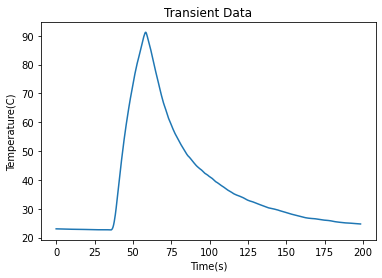

In [173]:
plt.plot(xdat, ydat)
plt.ylabel("Temperature(C)")
plt.xlabel("Time(s)")
plt.title("Transient Data")